<a href="https://colab.research.google.com/github/Jrand4/Consumer-Price-Index-Predictor/blob/main/Process_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process Notebook



## Abstract:
#### In this document I will describe the process I used to conduct my analysis for my project.

> This document contains all the data and methods used for this project, the recorded results produced from machine learning algorithms, and the purpose for such a project.


## Overview and Motivation

> The purpose of this project was to predict what the consumer price index would be if unemployment rates, gas prices, date, and temperature were to change. The motivation for this purpose was that if we can accurately predict the CPI and record which variable or variable combinations had the greatest affect in predicting CPI then we can predict at which times of the year inflation increases the most.

## Related Work & Initial Questions

> When this project was in its infancy, the original problem was if we could determine which department in a retail store would have the highest sales during different times of the year. This question was inspired by the fact that I used work in inventory at Walmart. This information would have been useful by allocating shelf space to departments that were predicted to sell more items at that time to increase profits. This question ended up evolving into predicting the consumer price index as the information I had was difficult to find a correlation. This may have been due to my lack of experience with data analysis.

## Data

> I downloaded my data from https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data, and removed the columns I wasn't using as well as storing the ones I needed into a dataframe. I used a multiple regression model to predict the CPI. Entire process is shown below.










---


#### Using Multiple Regression Model to predict CPI from date,temperature,gas prices, unemployment


---







In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
features = pd.read_csv('drive/MyDrive/Project_Rand/data/features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores = pd.read_csv('drive/MyDrive/Project_Rand/data/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train = pd.read_csv('drive/MyDrive/Project_Rand/data/train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
gfdf = features[features['Store'] == 1]
gfdf = gfdf[gfdf['Date'] < '2012-10-26']
depsum = train.groupby(['Date'],as_index=False)['Weekly_Sales'].mean()
depsum = depsum[depsum['Date'] < '2012-10-26']
gas = gfdf.groupby(['Date'],as_index=False)['Fuel_Price'].mean()
unploy = gfdf.groupby(['Date'],as_index=False)['Unemployment'].mean()
temp = gfdf.groupby(['Date'],as_index=False)['Temperature'].mean()
cpi = gfdf.groupby(['Date'],as_index=False)['CPI'].mean()
hol = gfdf['IsHoliday'].head(len(cpi['CPI']))
time = gfdf['Date'].head(len(cpi['CPI']))
times = mdates.datestr2num(time)
times = times.astype(int)
df = temp.merge(gas,on='Date')
df = df.merge(unploy,on='Date')
df = df.merge(depsum,on='Date')
df = df.merge(cpi,on='Date')
df['Date'] = mdates.datestr2num(df['Date'])
df.head()


,Date,Temperature,Fuel_Price,Unemployment,Weekly_Sales,CPI
0,733808.0,42.31,2.572,8.106,16836.121997,211.096358
1,733815.0,38.51,2.548,8.106,16352.056032,211.242170
2,733822.0,39.93,2.514,8.106,16216.658979,211.289143
3,733829.0,46.63,2.561,8.106,14899.549688,211.319643
4,733836.0,46.50,2.625,8.106,15921.015727,211.350143


In [ ]:
X = df[['Date','Fuel_Price','Unemployment','Temperature']]
y = df['CPI']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr = LinearRegression()
regr.fit(X_train,y_train)
# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

# Predict the values of unseen items
predicted_targets = regr.predict(X_test)


Coefficients: [ 0.01298719  0.35262367 -1.39090803 -0.01284069]
Residual sum of squares: 0.72


In [ ]:
predicted_targets

array([213.41868713, 215.69196385, 210.39230096, 214.57490894,
       210.92520143, 209.52234819, 219.88342299, 223.90393281,
       216.76161862, 219.21251374, 217.73888647, 221.79477266,
       209.88422872, 218.30781738, 223.74727021, 211.91296114,
       216.6036209 , 216.63688643, 220.77163604, 211.0580517 ,
       215.30555376, 216.76015243, 215.11048862, 211.19777758,
       215.2141615 , 210.54216128, 215.56413125, 219.76863885,
       213.36367941, 221.35530105, 209.13884933, 211.31366297,
       215.8788205 , 210.04542809, 213.18741325, 219.36798811])

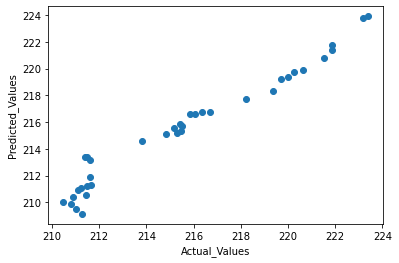

----
Root Mean Squared Error  : 0.85
Mean Absolute Error  : 0.66
----


In [ ]:
plt.xlabel("Actual_Values")
plt.ylabel("Predicted_Values")
plt.scatter(y_test,predicted_targets)
plt.show()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math
print("----\nRoot Mean Squared Error  : %.2f"
      % math.sqrt(mean_squared_error(y_test,predicted_targets)))
print("Mean Absolute Error  : %.2f\n----"
      % mean_absolute_error(y_test,predicted_targets))



---



---


#### Testing Features with RFE


---



In [ ]:
from sklearn.feature_selection import RFE

# Create the RFE object using two features and rank the features for the diabetes datasets
rfe = RFE(estimator=regr, n_features_to_select=1, step=1)
rfe.fit(X_train,y_train)
rfe1 = RFE(estimator=regr, n_features_to_select=2, step=1)
rfe1.fit(X_train,y_train)
rfe2 = RFE(estimator=regr, n_features_to_select=3, step=1)
rfe2.fit(X_train,y_train)
rfe3 = RFE(estimator=regr, n_features_to_select=4, step=1)
rfe3.fit(X_train,y_train)
print("1 Feature:",rfe.ranking_,"\n2 Features:",rfe1.ranking_,"\n3 Features:",rfe2.ranking_,"\n4 Features:",rfe3.ranking_)

1 Feature: [3 2 1 4] 
2 Features: [2 1 1 3] 
3 Features: [1 1 1 2] 
4 Features: [1 1 1 1]


In [ ]:
print("1 Feature : Residual sum of squares: %.4f"
      % np.mean((rfe.predict(X_test) - y_test) ** 2))
print("2 Features : Residual sum of squares: %.4f"
      % np.mean((rfe1.predict(X_test) - y_test) ** 2))
print("3 Features : Residual sum of squares: %.4f"
      % np.mean((rfe2.predict(X_test) - y_test) ** 2))
print("4 Features : Residual sum of squares: %.4f"
      % np.mean((rfe3.predict(X_test) - y_test) ** 2))

print("\n\n1 Feature : Score: %.4f"
      % rfe.score(X_test,y_test))
print("2 Features  : Score: %.4f"
      % rfe1.score(X_test,y_test))
print("3 Features  : Score: %.4f"
      % rfe2.score(X_test,y_test))
print("4 Features  : Score: %.4f"
      % rfe3.score(X_test,y_test))

1 Feature : Residual sum of squares: 7.0382
2 Features : Residual sum of squares: 3.5775
3 Features : Residual sum of squares: 0.7617
4 Features : Residual sum of squares: 0.7173


1 Feature : Score: 0.5830
2 Features  : Score: 0.7881
3 Features  : Score: 0.9549
4 Features  : Score: 0.9575


#### Testing with 4 features produced the highest score (R^2) 



---


## Testing Multiple Regression Model [Within DataFrame]


---





In [ ]:
# Test with ~99% accuracy
test_date = '2010-02-05'        # year-month-day
test_gas = 2.717                 # gas price in dollars
test_unemployment = 8.619         # range 1% - 100%
test_temperature = 42           # in farenheit (Has very little affect)

predicted_CPI = rfe3.predict([[mdates.datestr2num(test_date),test_gas,test_unemployment,test_temperature]])
actual_CPI = 211.09

error = abs(predicted_CPI - actual_CPI)/actual_CPI * 100
print("Predicted: %.2f" % predicted_CPI[0] , "\nActual: ",actual_CPI)
print("Accuracy: %.2f" % (100 - error[0]),"%")
print("Error: %.2f" % error[0],"%")

Predicted: 208.29 
Actual:  211.09
Accuracy: 98.67 %
Error: 1.33 %


---
## Testing Multiple Regression Model [Outside DataFrame (2013)] (Near Future)
---

In [ ]:
# Test with ~97% accuracy
test_date = '2013-02-05'        # year-month-day
test_gas = 3.52                 # gas price in dollars
test_unemployment = 7.0         # range 1% - 100%
test_temperature = 36.8           # in farenheit (Has very little affect)
predicted_CPI = rfe3.predict([[mdates.datestr2num(test_date),test_gas,test_unemployment,test_temperature]])

actual_CPI = 232.166

error = abs(predicted_CPI - actual_CPI)/actual_CPI * 100
print("Predicted: %.2f" % predicted_CPI[0] , "\nActual: ",actual_CPI)
print("Accuracy: %.2f" % (100 - error[0]),"%")
print("Error: %.2f" % error[0],"%")

Predicted: 225.12 
Actual:  232.166
Accuracy: 96.97 %
Error: 3.03 %




---


## Testing Multiple Regression Model [Outside DataFrame (2019)]


---





In [ ]:
# Test with ~98% accuracy
test_date = '2019-02-05'        # year-month-day
test_gas = 2.60                 # AVG Gas in Feb 2019 | Source www.eia.gov
test_unemployment = 3.8         # AVG Unemployment Feb 2019 | Source mass.gov
test_temperature = 32           # AVG Feb Temp | Source ncdc.noaa.gov

predicted_CPI = rfe3.predict([[mdates.datestr2num(test_date),test_gas,test_unemployment,test_temperature]])
actual_CPI = 252.776            # Source bls.gov

error = abs(predicted_CPI - actual_CPI)/actual_CPI * 100
print("Predicted: %.2f" % predicted_CPI[0] , "\nActual: ",actual_CPI)
print("Accuracy: %.2f" % (100 - error[0]),"%")
print("Error: %.2f" % error[0],"%")

Predicted: 257.77 
Actual:  252.776
Accuracy: 98.03 %
Error: 1.97 %


## Exploratory Data Analysis: 

> In the beginning I used visualizations to see if an obvious correlation could be found. 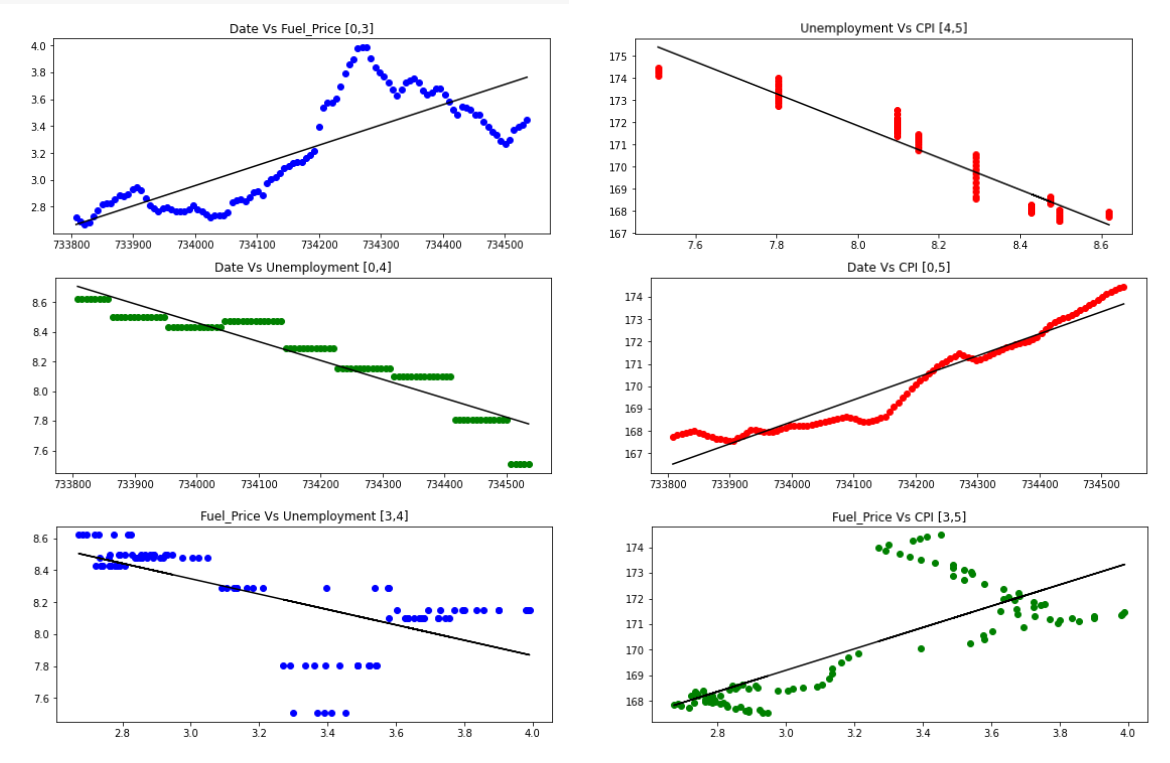



> Then once I found them I used the multiple regression model to compare predictions with actual values (shown in data) 

> Next when I tested the score and saw that it was decently high (0.97) I felt that this was the right path to get accurate predictions.



---


## Model Revision:

#### [Multiple Regression Model]:

> I've narrowed down the scope from predicting multiple department sales from multiple retail stores to predicting a single value (CPI) from 4 variables using multiple regression. I found that when testing data within the database the program was VERY accurate in predicting cpi (around 99% accuracy). When I tried predicting cpi outside of the database (9 years into the future or 2019) it was still accurate (around 97% accuracy). Therefore this program could be used for near or far future predictions as long as the independent variables are accurately predicted as well. 

---








## Full Analysis:

#### What I learned from the data:

> I learned that you can predict the consumer price index from gas prices, temperature, unemployment rate, and time. I learned that even the less impactful variables (temperature) are important as long as the score improves to give you the most accurate prediction.

#### How the questions were answered:

> Using the multiple regression model, we can predict near and far future CPI values with excellent accuracy. This would help in predicting inflation should certain variables change.  

#### How the answers are justified:

> The answers were justified by comparing them to actual values. Since this data was recorded from 2010 and this program was written in 2020, we can compare the predictions to actual values. Now that we know that near and far future predictions can be calculated with high accuracy we would simply need to record new data for the independent variables to predict a future cpi value. 




